In [ ]:
#Mount the local drive project_forder
from google.colab import drive
drive.mount('/content/drive/' , force_remount=True)

Mounted at /content/drive/


In [ ]:
!ls "/content/drive/My Drive/Data_Science/CNNMalariaModel"
#replace the path above by the folder from where you work this out.

cell_images		   Group4MalariaCellDetectionCNN.ipynb	train
CNN_malaria_classifier.h5  test


In [ ]:
cd '/content/drive/My Drive/Data_Science/CNNMalariaModel'

/content/drive/My Drive/Data_Science/CNNMalariaModel


In [ ]:
ls

cell_images/               Group4MalariaCellDetectionCNN.ipynb  train/
CNN_malaria_classifier.h5  test/


In [ ]:
# Use GPU: Please check if the outpout is '/device:GPU:0'
import tensorflow as tf
print(tf.__version__)
tf.test.gpu_device_name()
#from tensorflow.python.client import device_lib
#device_lib.list_local_devices()

1.15.0


'/device:GPU:0'

In [ ]:
ls

cell_images/  test/  train/  Untitled0.ipynb


In [ ]:
import numpy as np

import pandas as pd
from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.transform import resize
import operator
from tqdm import tqdm
import itertools

from keras.optimizers import SGD
from keras.utils import np_utils

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

Using TensorFlow backend.


In [ ]:
# Importing basic libraries
import os
import random
import shutil
from matplotlib import pyplot
from matplotlib.image import imread
%matplotlib inline

# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D as Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

Visualise Parasitized vs Uninfected Cells

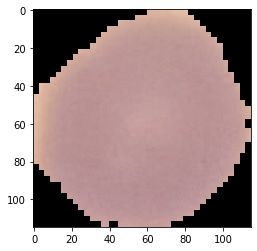

In [ ]:
# Print a single uninfected cell
img = np.asarray(Image.open('/content/drive/My Drive/Data_Science/CNNMalariaModel/cell_images/Uninfected/C1_thinF_IMG_20150604_104722_cell_9.png'))
imshow(img)

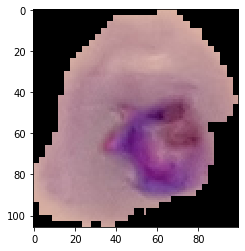

In [ ]:
# Print a single parasitized cell
img = np.asarray(Image.open('/content/drive/My Drive/Data_Science/CNNMalariaModel/cell_images/Parasitized/C39P4thinF_original_IMG_20150622_105102_cell_83.png'))
imshow(img)

**Creating Path for CNNMalariaModel folder, cell_images folder, training and testing Path**

In [ ]:
# Define the useful paths for data accessibility
ai_project = '/content/drive/My Drive/Data_Science/CNNMalariaModel' #"/content/drive/My Drive/Colab Notebooks/ai-labs-master/malaria-diagnosis"
cell_images_dir = os.path.join(ai_project,'cell_images')
training_path = os.path.join(ai_project,'train')
testing_path = os.path.join(ai_project,'test')

infected_path = os.path.join(cell_images_dir,'Parasitized')
Uninfected_path = os.path.join(cell_images_dir,'Uninfected')

In [ ]:
# Checking the length of Images in Each Folder
print('Number of Parasitized Cell Images: ',len(os.listdir(infected_path)))
print('Number of Uninfected Cell Images: ',len(os.listdir(Uninfected_path)))

In [ ]:
#Print Path to CNNMalariaModel folder
ai_project

'/content/drive/My Drive/Data_Science/CNNMalariaModel'

In [ ]:
#Print Path to test folder
testing_path

'/content/drive/My Drive/Data_Science/CNNMalariaModel/test'

13780 Uninfected images: view of 9 samples
(133, 130, 3)


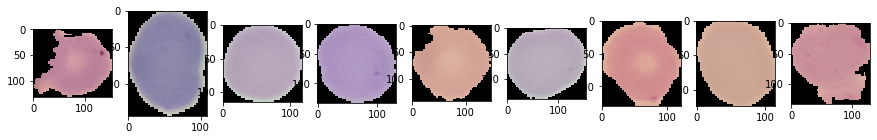

In [ ]:
# Visualize some samples (randomly selected) of blood smears from healthy patients 
N_samples = 9
uninfected_dir = os.path.join(cell_images_dir,'Uninfected')
uninfected_samples = random.sample(os.listdir(uninfected_dir), N_samples)
pyplot.figure(figsize=(15,3))
print("{} Uninfected images: view of {} samples".format(len(os.listdir(uninfected_dir)), N_samples))
i = 0
while i < N_samples: # in random.sample(os.listdir(parasitized_dir), 6):
    pyplot.subplot(1,N_samples,1+i)
    img_uninfected = imread(os.path.join(uninfected_dir, uninfected_samples[i]))
    pyplot.imshow(img_uninfected)
    i+=1
print(img_uninfected.shape)

In [ ]:
print("{} Uninfected images: view of {} samples".format(len(os.listdir(uninfected_dir)), N_samples))

13780 Uninfected images: view of 9 samples


In [ ]:
uninfected_samples

['C5NThinF_IMG_20150609_122227_cell_59.png',
 'C153P114ThinF_IMG_20151115_135832_cell_236.png',
 'C209ThinF_IMG_20151029_160721_cell_237.png',
 'C189P150ThinF_IMG_20151203_141901_cell_73.png',
 'C91P52ThinF_IMG_20150821_124504_cell_38.png',
 'C216ThinF_IMG_20151106_134931_cell_41.png',
 'C75P36_ThinF_IMG_20150815_162935_cell_51.png',
 'C42P5thin_original_IMG_20150623_134547_cell_134.png',
 'C68P29N_ThinF_IMG_20150819_134112_cell_55.png']

In [ ]:
img_uninfected.std()

0.30460778

13780 Parasitized images: view of 6 samples
(136, 151, 3)


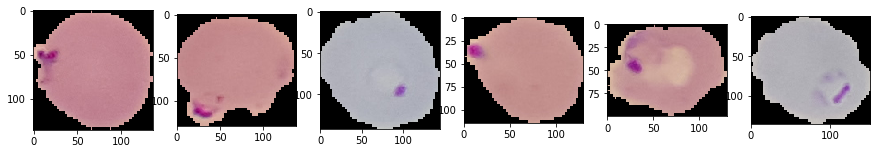

In [ ]:
# Visualize some samples (randomly selected) of blood smears from patients falciparum-infected 
N_samples = 6
print("{} Parasitized images: view of {} samples".format(len(os.listdir(uninfected_dir)), N_samples))
parasitized_dir = os.path.join(cell_images_dir,'Parasitized')
parasitized_samples = random.sample(os.listdir(parasitized_dir), N_samples)
pyplot.figure(figsize=(15,3))
i = 0
while i < N_samples: # in random.sample(os.listdir(parasitized_dir), 6):
    pyplot.subplot(1,N_samples,1+i)
    #Not Implemented
    img_parasitized = imread(os.path.join(parasitized_dir, parasitized_samples[i]))
    pyplot.imshow(img_parasitized)
    i+=1
print(img_parasitized.shape)

In [ ]:
img_parasitized.shape

(136, 151, 3)

In [ ]:
parasitized_samples

['C132P93ThinF_IMG_20151004_152045_cell_153.png',
 'C136P97ThinF_IMG_20151005_140646_cell_122.png',
 'C180P141NThinF_IMG_20151201_164714_cell_194.png',
 'C70P31_ThinF_IMG_20150813_130332_cell_105.png',
 'C84P45ThinF_IMG_20150818_102507_cell_101.png',
 'C168P129ThinF_IMG_20151118_155802_cell_155.png']

In [ ]:
img_parasitized

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
print("{} Parasitized images: view of {} samples".format(len(os.listdir(uninfected_dir)), N_samples))

13780 Parasitized images: view of 6 samples


In [ ]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('../input/cell_images/cell_images/Parasitized' + "/" + infected_data[i])
    plt.imshow(img)
    plt.title('INFECTED : 1')
    plt.tight_layout()
plt.show()

In [ ]:
# Only run this cell once
def create_train_test_data(class_name, train_split = 0.8):
    '''
      #Create a function create_train_test_data to split data into 
      #training and testing sets with respectives proportion 80%, 20%
      #--Train (@training_path)
          #--Parasitized
          #--Uninfected
      #--Test (@training_path)
          #--Parasitized
          #--Uninfected
      @class_name: 'Parasitized' or 'Uninfected'
      @train_split: eg. 80% train 20% test
    '''    
    train_class_path = os.path.join(training_path,class_name)  
    test_class_path = os.path.join(testing_path,class_name)

    class_img_names = [img for img in os.listdir(os.path.join(cell_images_dir, class_name))]
    random.seed(42)
    random.shuffle(class_img_names)

    # compute the training and testing split
    i = int(len(class_img_names) * train_split)
    train_class_img_names = class_img_names[:i]
    test_class_img_names = class_img_names[i:]

    def copy_imgs(learn_class_img_names, learn_class_path):
        if not os.path.exists(learn_class_path):
            os.makedirs(learn_class_path)
        for img in learn_class_img_names:
            p_orig = os.path.join(cell_images_dir,class_name,img) 
            p_dest = os.path.join(learn_class_path,img) 
            shutil.copy2(p_orig, p_dest)

    copy_imgs(train_class_img_names, train_class_path)
    copy_imgs(test_class_img_names, test_class_path)

SplitTrainTest = True
if SplitTrainTest == True:
    #Not Implemented
    if os.path.exists(training_path): shutil.rmtree(training_path)
    if os.path.exists(testing_path): shutil.rmtree(testing_path)
    create_train_test_data('Parasitized', train_split = 0.8) # Create the training and testing subset for Parasitized class by using function create_train_test_data
    create_train_test_data('Uninfected', train_split = 0.8) # Create the training and testing subset for Uninfected class by using function create_train_test_data
!ls train/ test/  # Check if training_path and testing_path folders with both classes are created
!ls train/Parasitized | wc -l

In [ ]:
!ls train/ test/  # Check if training_path and testing_path folders with both classes are created
!ls train/Parasitized | wc -l

test/:
Parasitized  Uninfected

train/:
Parasitized  Uninfected
11024


In [ ]:
print(len(os.listdir(cell_images_dir)))

2


In [ ]:
# Define some useful paths for data accessibility and Checking Training Dataset
para_train_path = os.path.join(ai_project,'train/Parasitized')
uninfec_train_path = os.path.join(ai_project,'train/Uninfected')

print(len(os.listdir(para_train_path)))
print(len(os.listdir(uninfec_train_path)))

11024
11024


In [ ]:
# Checking Testing Dataset
para_test_path = os.path.join(ai_project,'test/Parasitized')
uninfec_test_path = os.path.join(ai_project,'test/Uninfected')

print(len(os.listdir(para_test_path)))
print(len(os.listdir(uninfec_test_path)))

2756
2756


In [ ]:
# Printing 10 images name from the Train datasets

train_infected_names = os.listdir(para_train_path)
print(train_infected_names[:10])

train_uninfected_names = os.listdir(uninfec_train_path)
print(train_uninfected_names[:10])


['C84P45ThinF_IMG_20150818_101146_cell_91.png', 'C39P4thinF_original_IMG_20150622_111206_cell_111.png', 'C116P77ThinF_IMG_20150930_171448_cell_100.png', 'C48P9thinF_IMG_20150721_160944_cell_234.png', 'C180P141NThinF_IMG_20151201_165601_cell_169.png', 'C48P9thinF_IMG_20150721_161243_cell_154.png', 'C99P60ThinF_IMG_20150918_142128_cell_78.png', 'C184P145ThinF_IMG_20151203_103637_cell_168.png', 'C182P143NThinF_IMG_20151201_172607_cell_18.png', 'C99P60ThinF_IMG_20150918_140900_cell_146.png']
['C53P14thinF_IMG_20150726_115457_cell_72.png', 'C77P38ThinF_IMG_20150602_111510_cell_53.png', 'C137P98ThinF_IMG_20151005_161859_cell_8.png', 'C67P28N_ThinF_IMG_20150819_115417_cell_177.png', 'C46P7ThinF_IMG_20151130_210123_cell_112.png', 'C114P75ThinF_IMG_20150930_150145_cell_29.png', 'C207ThinF_IMG_20151029_143952_cell_3.png', 'C207ThinF_IMG_20151029_143952_cell_113.png', 'C93P54ThinF_IMG_20150821_163640_cell_141.png', 'C61P22N_ThinF_IMG_20150818_112433_cell_152.png']


In [ ]:
# Printing 10 images name from the Test datasets

test_infected_names = os.listdir(para_test_path)
print(test_infected_names[:10])

test_uninfected_names = os.listdir(uninfec_test_path)
print(test_uninfected_names[:10])

['C131P92ThinF_IMG_20151004_145224_cell_134.png', 'C119P80ThinF_IMG_20151002_123043_cell_158.png', 'C167P128ReThinF_IMG_20151201_105559_cell_232.png', 'C180P141NThinF_IMG_20151201_163702_cell_199.png', 'C99P60ThinF_IMG_20150918_141001_cell_151.png', 'C81P42ThinF_IMG_20150817_120712_cell_159.png', 'C97P58ThinF_IMG_20150917_151903_cell_27.png', 'C99P60ThinF_IMG_20150918_140900_cell_134.png', 'C163P124ThinF_IMG_20151116_111350_cell_2.png', 'C39P4thinF_original_IMG_20150622_114804_cell_35.png']
['C119P80ThinF_IMG_20151002_123608_cell_51.png', 'C224ThinF_IMG_20151112_112834_cell_143.png', 'C90P51ThinF_IMG_20150821_115846_cell_1.png', 'C99P60ThinF_IMG_20150918_141351_cell_83.png', 'C151P112ThinF_IMG_20151115_121725_cell_120.png', 'C212ThinF_IMG_20151106_110411_cell_91.png', 'C1_thinF_IMG_20150604_104942_cell_59.png', 'C68P29N_ThinF_IMG_20150819_134326_cell_3.png', 'C91P52ThinF_IMG_20150821_124739_cell_133.png', 'C94P55ThinF_IMG_20150821_170403_cell_1.png']


In [ ]:

%matplotlib inline

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

(136, 109, 3)
(136, 124, 3)
(133, 124, 3)
(148, 133, 3)
(145, 133, 3)
(157, 169, 3)
(178, 154, 3)
(136, 133, 3)
(127, 160, 3)
(136, 145, 3)
(82, 91, 3)
(205, 145, 3)
(130, 106, 3)
(169, 115, 3)
(118, 118, 3)
(133, 136, 3)


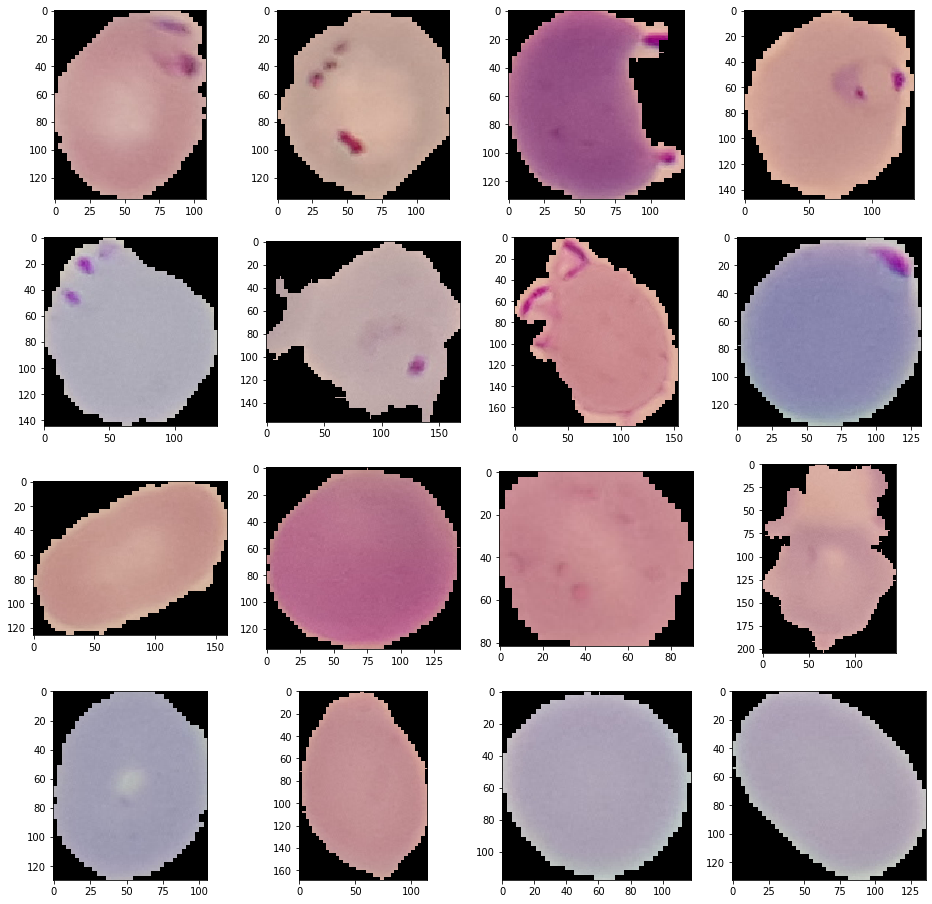

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_infected_pix = [os.path.join(para_train_path, fname) 
                for fname in train_infected_names[pic_index-8:pic_index]]
next_uninfected_pix = [os.path.join(uninfec_train_path, fname) 
                for fname in train_uninfected_names[pic_index-8:pic_index]]


for i, img_path in enumerate(next_infected_pix+next_uninfected_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('On') # show axes (or gridlines)

  img = mpimg.imread(img_path)
  print(img.shape)
  plt.imshow(img)

plt.show()

Re imort some essential module to avoid confusion

In [ ]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers

**Creating and Building the Model**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(80, 80, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class (uninfected) and 0 class (infected)
    tf.keras.layers.Dense(1, activation='sigmoid')
]
)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [ ]:
# Compile the model
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 256 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/Data_Science/CNNMalariaModel/train/',  # This is the source directory for training images
        target_size=(80, 80),  # All images will be resized to 96x96
        batch_size=256,
        # Since we use binary_crossentropy loss, we use binary labels
        class_mode='binary')

Found 22046 images belonging to 2 classes.


In [ ]:
# Training with 15 iterations 
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  
      epochs=15,
      verbose=1)

Epoch 1/15
100/100 [==============================] - 7738s 77s/step - loss: 0.7011 - acc: 0.5499
Epoch 2/15
100/100 [==============================] - 74s 736ms/step - loss: 0.6523 - acc: 0.6210
Epoch 3/15
100/100 [==============================] - 72s 718ms/step - loss: 0.5280 - acc: 0.7256
Epoch 4/15
100/100 [==============================] - 71s 709ms/step - loss: 0.2868 - acc: 0.8782
Epoch 5/15
100/100 [==============================] - 71s 713ms/step - loss: 0.1692 - acc: 0.9395
Epoch 6/15
100/100 [==============================] - 73s 726ms/step - loss: 0.1391 - acc: 0.9523
Epoch 7/15
100/100 [==============================] - 72s 725ms/step - loss: 0.1261 - acc: 0.9576
Epoch 8/15
100/100 [==============================] - 70s 701ms/step - loss: 0.1170 - acc: 0.9597
Epoch 9/15
100/100 [==============================] - 71s 709ms/step - loss: 0.1069 - acc: 0.9636
Epoch 10/15
100/100 [==============================] - 71s 709ms/step - loss: 0.0982 - acc: 0.9656
Epoch 11/15
100/100

In [ ]:
model.save('CNN_malaria_classifier.h5')  # creates a HDF5 file 'my_model.h5'

<Figure size 432x288 with 0 Axes>

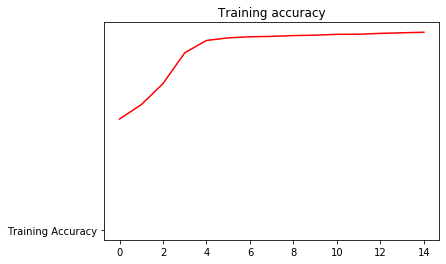

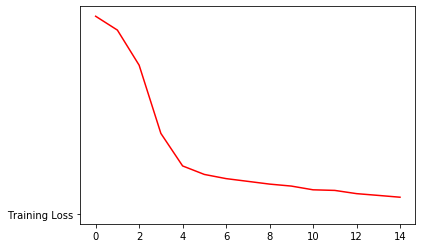

<Figure size 432x288 with 0 Axes>

In [ ]:

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
tr_acc=history.history['acc']
loss=history.history['loss']

epochs=range(len(tr_acc)) # Get number of epochs

#------------------------------------------------
# Plot training accuracy per epoch
#------------------------------------------------
plt.plot(epochs, tr_acc, 'r', "Training Accuracy")

plt.title('Training accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.figure()

In [ ]:
# Predict the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        '/content/drive/My Drive/Data_Science/CNNMalariaModel/test/',
        target_size=(80, 80),
        color_mode="rgb",
        shuffle = False,
        class_mode='binary',
        batch_size=1)

filenames = test_generator.filenames
nb_samples = len(filenames)

predict = model.predict_generator(test_generator,steps = nb_samples, verbose=1)

Found 5512 images belonging to 2 classes.
5512/5512 [==============================] - 1889s 343ms/step


In [ ]:
loss, acc = model.evaluate_generator(test_generator, steps=nb_samples)

In [ ]:
loss

0.16980054371154052

In [ ]:
acc

0.95301163

In [ ]:
predict

array([[0.0000000e+00],
       [1.2128695e-04],
       [0.0000000e+00],
       ...,
       [9.5980847e-01],
       [9.0106529e-01],
       [9.9826592e-01]], dtype=float32)

In [ ]:
y_pred = model.predict(test_generator)

In [ ]:
ytest = test_uninfected_names + test_infected_names

In [ ]:
y = np.array(ytest)

In [ ]:
y

array(['C119P80ThinF_IMG_20151002_123608_cell_51.png',
       'C224ThinF_IMG_20151112_112834_cell_143.png',
       'C90P51ThinF_IMG_20150821_115846_cell_1.png', ...,
       'C63P24N_ThinF_IMG_20150818_143319_cell_163.png',
       'C136P97ThinF_IMG_20151005_141946_cell_95.png',
       'C48P9thinF_IMG_20150721_161055_cell_171.png'], dtype='<U61')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(predict.argmax(axis=1), predict.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5512

    accuracy                           1.00      5512
   macro avg       1.00      1.00      1.00      5512
weighted avg       1.00      1.00      1.00      5512



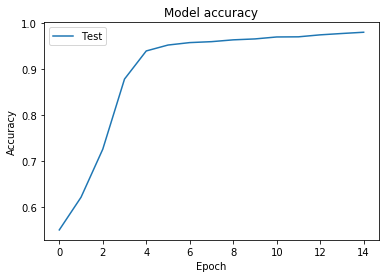

In [ ]:
# Plot test accuracy
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test'], loc='upper left')
plt.show()